# Train FCN on Building Dataset

In [2]:
import polars as pl

from src.energy_forecast.config import PROCESSED_DATA_DIR

df = pl.read_csv(PROCESSED_DATA_DIR / "dataset_building_interpolate_daily_lag_7_7_feat.csv")
df

id,datetime,diff,hum_avg,hum_min,hum_max,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,daily_avg,heated_area,heated_area_lod,anzahlwhg,ground_surface,building_height,storeys_above_ground,weekend,holiday,diff(t-1),diff(t-2),diff(t-3),diff(t-4),diff(t-5),diff(t-6),diff(t-7),diff(t+1),diff(t+2),diff(t+3),diff(t+4),diff(t+5),diff(t+6),typ_0,typ_1,typ_2,typ_4,primary_energy_district heating,primary_energy_gas,day_of_month_sin,day_of_month_cos,weekday_sin,weekday_cos
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str,str,str,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""400284SVG-0""","""2018-03-03T00:00:00.000000""",5523.44,63.833333,47.0,79.0,-6.9,-11.5,-1.7,0.0,70.0,85.0,17.6,37.8,1006.1,588.0,1986.382003,3684.0,null,48.0,null,null,null,1,1,5619.49,5700.85,5604.8,5214.95,4975.39,4987.82,4349.37,5253.37,4001.33,3608.09,3913.19,3669.11,3483.79,1.0,0.0,0.0,0.0,0.0,1.0,0.707107,0.707107,1.0,6.1232e-17
"""400284SVG-0""","""2018-03-04T00:00:00.000000""",5253.37,58.125,45.0,71.0,-2.7,-8.7,2.6,1.8,70.0,104.0,19.1,36.0,1002.2,168.0,1986.382003,3684.0,null,48.0,null,null,null,1,1,5523.44,5619.49,5700.85,5604.8,5214.95,4975.39,4987.82,4001.33,3608.09,3913.19,3669.11,3483.79,3422.77,1.0,0.0,0.0,0.0,0.0,1.0,0.866025,0.5,0.965926,-0.258819
"""400284SVG-0""","""2018-03-05T00:00:00.000000""",4001.33,77.25,53.0,96.0,2.8,-1.6,10.6,0.1,50.0,138.0,14.0,34.9,996.4,330.0,1986.382003,3684.0,null,48.0,null,null,null,0,1,5253.37,5523.44,5619.49,5700.85,5604.8,5214.95,4975.39,3608.09,3913.19,3669.11,3483.79,3422.77,2640.81,1.0,0.0,0.0,0.0,0.0,1.0,0.965926,0.258819,0.258819,0.965926
"""400284SVG-0""","""2018-03-06T00:00:00.000000""",3608.09,77.041667,57.0,96.0,2.0,-3.4,7.6,1.3,0.0,106.0,11.5,28.8,994.3,474.0,1986.382003,3684.0,null,48.0,null,null,null,0,1,4001.33,5253.37,5523.44,5619.49,5700.85,5604.8,5214.95,3913.19,3669.11,3483.79,3422.77,2640.81,2387.69,1.0,0.0,0.0,0.0,0.0,1.0,1.0,6.1232e-17,0.5,0.866025
"""400284SVG-0""","""2018-03-07T00:00:00.000000""",3913.19,94.708333,85.0,98.0,0.5,-0.2,1.2,6.8,0.0,332.0,5.4,14.8,994.9,0.0,1986.382003,3684.0,null,48.0,null,null,null,0,1,3608.09,4001.33,5253.37,5523.44,5619.49,5700.85,5604.8,3669.11,3483.79,3422.77,2640.81,2387.69,2630.64,1.0,0.0,0.0,0.0,0.0,1.0,0.965926,-0.258819,0.707107,0.707107
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""f6f7e866-e013-11eb-9d61-02b402…","""2023-09-08T00:00:00.000000""",245.21,72.25,35.0,100.0,18.9,10.8,28.0,0.0,0.0,108.0,8.7,19.1,1019.5,744.0,636.310798,1201.78,null,64.0,null,null,null,0,1,210.18,211.31,213.57,213.57,215.83,236.17,239.56,229.39,202.27,201.14,205.66,214.7,221.48,0.0,0.0,0.0,1.0,0.0,1.0,0.866025,-0.5,0.965926,0.258819
"""f6f7e866-e013-11eb-9d61-02b402…","""2023-09-09T00:00:00.000000""",229.39,74.291667,32.0,100.0,19.0,10.1,29.6,0.0,0.0,131.0,6.7,16.6,1018.4,738.0,636.310798,1201.78,null,64.0,null,null,null,1,1,245.21,210.18,211.31,213.57,213.57,215.83,236.17,202.27,201.14,205.66,214.7,221.48,238.43,0.0,0.0,0.0,1.0,0.0,1.0,0.707107,-0.707107,1.0,6.1232e-17
"""f6f7e866-e013-11eb-9d61-02b402…","""2023-09-10T00:00:00.000000""",202.27,77.041667,41.0,100.0,20.4,12.3,29.9,0.0,0.0,139.0,5.2,14.8,1018.2,708.0,636.310798,1201.78,null,64.0,null,null,null,1,1,229.39,245.21,210.18,211.31,213.57,213.57,215.83,201.14,205.66,214.7,221.48,238.43,246.34,0.0,0.0,0.0,1.0,0.0,1.0,0.5,-0.866025,0.965926,-0.258819


## Train Test Split

I'll create a stratified train-test split based on the 'id' column to ensure each sensor is represented in both train and test sets with an 80-20 split ratio.

In [4]:
import numpy as np
from sklearn.model_selection import GroupShuffleSplit

df = df.to_pandas()

# Create train/test split while keeping ids proportionally distributed
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(df, groups=df['id']))

train_df = df.take(train_idx)
test_df = df.take(test_idx)

# Print shapes to verify the split
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

# Verify that all ids are in both train and test
print("\nUnique ids in train:", len(train_df['id'].unique()))
print("Unique ids in test:", len(test_df['id'].unique()))

Train shape: (49360, 48)
Test shape: (6803, 48)

Unique ids in train: 118
Unique ids in test: 30


The split ensures:
1. Approximately 80% of the data is in training set and 20% in test set
2. Time series from each sensor (id) is present in both train and test sets
3. The split is reproducible due to fixed random_state


## Training of FCN

In [7]:
from src.energy_forecast.config import FEATURE_SET_2

n_in = 7
n_out = 1
features = FEATURE_SET_2 + [f"diff(t-{i})" for i in range(1, n_in+1)]
target = ["diff" if i==0 else f"diff(t+{n_out})" for i in range(n_out)]

X_train, y_train = train_df[features], train_df[target]

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

model.summary()

2025-04-28 12:08:18.400156: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-28 12:08:18.409555: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745834898.421776   41717 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745834898.425374   41717 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745834898.434187   41717 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - loss: 1544096.2500 - mae: 479.2606 - val_loss: 146820.6875 - val_mae: 109.2207
Epoch 2/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - loss: 405455.7188 - mae: 270.7426 - val_loss: 4126707.2500 - val_mae: 647.8774
Epoch 3/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 277887.2500 - mae: 227.5963 - val_loss: 7586537.0000 - val_mae: 909.2615
Epoch 4/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - loss: 255735.9375 - mae: 218.4139 - val_loss: 5429804.0000 - val_mae: 782.7335
Epoch 5/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - loss: 242937.6562 - mae: 205.9366 - val_loss: 4322550.5000 - val_mae: 683.2726
Epoch 6/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - loss: 202693.9062 - mae: 194.7460 - val_loss: 2848473.2500 - val_mae: 570.7650
Epoch 7/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - loss: 220934.7500 - mae: 196.6224 - val_loss: 7696267.0000 - val_mae: 922.5325
Epoch 8/100
1234/1234 ━━━━━━━━━━━━

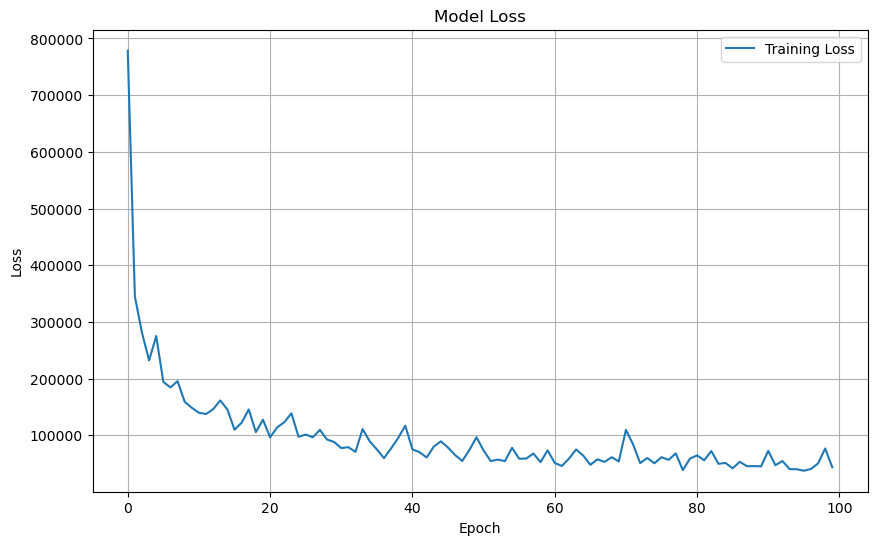

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


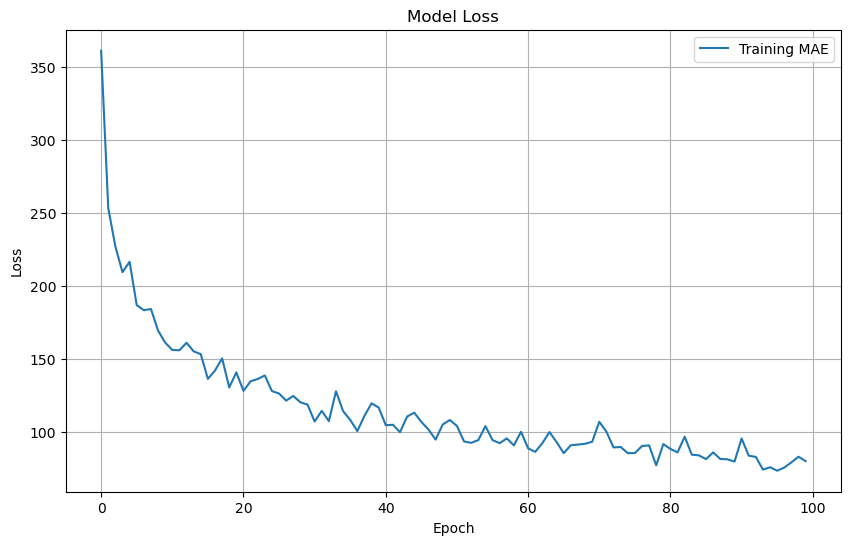

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Evaluate model performance

In [15]:
X_test, y_test = test_df[features], test_df[target]
y_hat = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)

# Replace zeros/very small values with 1e-7 to avoid division by zero
y_test_mape = y_test.copy()
y_test_mape[y_test_mape < 1e-7] = 1e-7
mape = np.mean(np.abs((y_test_mape - y_hat) / y_test_mape)) * 100

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')


213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
MSE: 3035674.75
RMSE: 1742.32
MAE: 775.49
MAPE: 80955413.76%


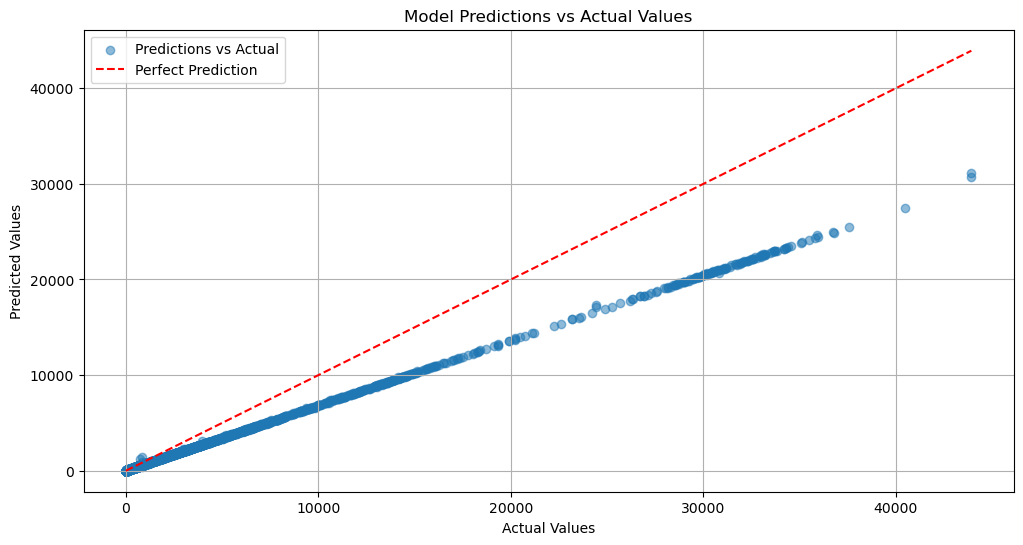

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_hat, alpha=0.5, label='Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

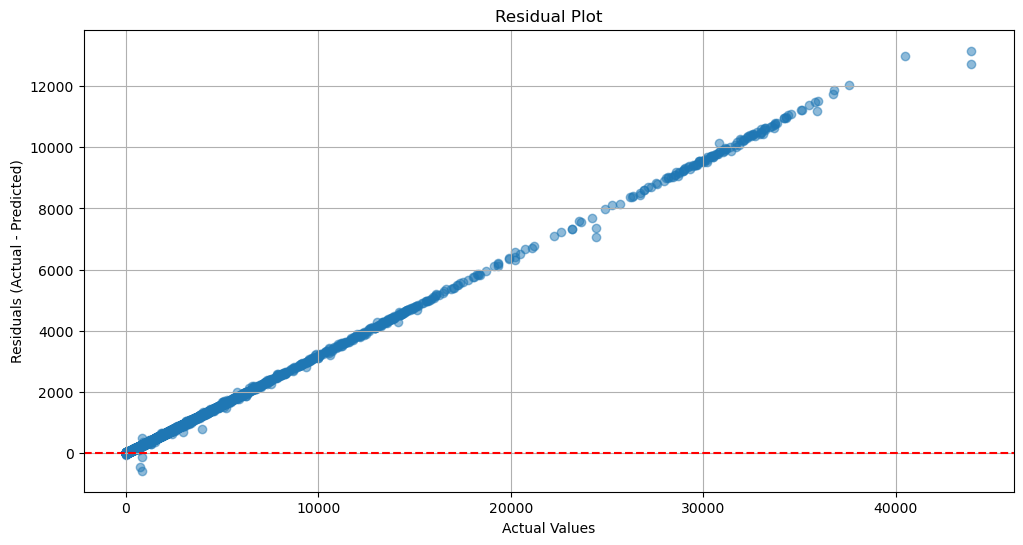

In [17]:
residuals = y_test.values - y_hat
plt.figure(figsize=(12, 6))
plt.scatter(y_test.values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()
